In [2]:
import pandas as pd

In [3]:
multas = pd.read_csv("D:/Santiago/OneDrive/Documentos/Pico_y_placa_project/Multas_2021.csv")
multas.head()

,X,Y,FID,OBJECTID,NUM_COMPAR,FECHA_HORA,ANO,HORA_OCURR,MES,MEDIO_DETE,CLASE_VEHI,TIPO_SERVI,INFRACCION,DES_INFRAC,LOCALIDAD,DIRECCION,MUNICIPIO,LATITUD,LONGITUD
0,-8.242585e+06,526231.941435,1,20561615,11001000000027921175,2021/03/01 00:00:00+00,2021,13:16:52,MARZO,DISPOSITIVOS EN VÍA,Automóvil,Particular,C02,ESTACIONAR UN VEHÍCULO EN SITIOS PROHIBIDOS.,1-USAQUEN,CR 17a x CL 137,BOGOT,4.721868,-74.044398
1,-8.248156e+06,510322.920694,2,20561616,11001000000027921807,2021/03/01 00:00:00+00,2021,13:24:28,MARZO,DISPOSITIVOS EN VÍA,Camión,Público,C38,USAR SISTEMAS MÓVILES DE COMUNICACIÓN O TELÉFO...,8-KENNEDY,DG 2 x CR 78,BOGOT,4.579425,-74.094448
2,-8.257700e+06,515254.652233,3,20561617,11001000000027921177,2021/03/01 00:00:00+00,2021,13:25:11,MARZO,DISPOSITIVOS EN VÍA,Camión,Público,H02,EL CONDUCTOR QUE NO PORTE LA LICENCIA DE TRASN...,9-FONTIBON,CR 111A x CL 18,BOGOT,4.623585,-74.180182
3,-8.242429e+06,526245.836741,4,20561618,11001000000027921178,2021/03/01 00:00:00+00,2021,13:27:30,MARZO,DISPOSITIVOS EN VÍA,Automóvil,Particular,C02,ESTACIONAR UN VEHÍCULO EN SITIOS PROHIBIDOS.,1-USAQUEN,CR 16a x CL 140,BOGOT,4.721992,-74.042999
4,-8.241331e+06,523668.869697,5,20561619,11001000000027921259,2021/03/01 00:00:00+00,2021,13:29:11,MARZO,DISPOSITIVOS EN VÍA,Motocicleta,Particular,D03,TRANSITAR EN SENTIDO CONTRARIO AL ESTIPULADO P...,1-USAQUEN,CR 45 x CL 170,BOGOT,4.698921,-74.033134


In [4]:
multas["LOCALIDAD"].unique()

array(['1-USAQUEN', '8-KENNEDY', '9-FONTIBON', '2-CHAPINERO',
       '18- RAFAEL URIBE', '14-MARTIRES', '10-ENGATIVA',
       '12-BARRIOS UNIDOS', '7-BOSA', '5-USME', '11-SUBA',
       '19-CIUDAD BOLIVAR', '13-TEUSAQUILLO', '4-SAN CRISTOBAL',
       '3-SANTA FE', '16-PUENTE ARANDA', '6-TUNJUELITO', '17-CANDELARIA',
       '15-ANTONIO NARIÑO', '-', 'USME', 'TEUSAQUILLO', 'MARTIRES',
       'SUBA', 'SAN CRISTOBAL', 'ENGATIVA', 'BARRIOS UNIDOS', 'KENNEDY',
       'CHAPINERO', 'FONTIBON', 'CIUDAD BOLIVAR', 'USAQUEN', 'SANTA FE',
       'BOSA', 'PUENTE ARANDA', 'ANTONIO NARIÑO', 'CANDELARIA',
       'TUNJUELITO', 'RAFAEL URIBE', 'LOS MARTIRES', 'ANTONIO NARINO',
       'RAFAEL URIBE URIBE', 'LA CANDELARIA', ' ', '20- SUMAPAZ',
       'SUMAPAZ'], dtype=object)

In [5]:
lista_de_valores = multas["LOCALIDAD"]

lista_sin_numeros = [''.join(filter(lambda x: not x.isdigit(), valor)).replace('-', '') for valor in lista_de_valores]

column_name = 'LOCALIDAD'
replacement_dict = dict(zip(lista_de_valores, lista_sin_numeros))
multas[column_name] = multas[column_name].map(replacement_dict)

# Print the updated DataFrame
multas["LOCALIDAD"].unique()

array(['USAQUEN', 'KENNEDY', 'FONTIBON', 'CHAPINERO', ' RAFAEL URIBE',
       'MARTIRES', 'ENGATIVA', 'BARRIOS UNIDOS', 'BOSA', 'USME', 'SUBA',
       'CIUDAD BOLIVAR', 'TEUSAQUILLO', 'SAN CRISTOBAL', 'SANTA FE',
       'PUENTE ARANDA', 'TUNJUELITO', 'CANDELARIA', 'ANTONIO NARIÑO', '',
       'RAFAEL URIBE', 'LOS MARTIRES', 'ANTONIO NARINO',
       'RAFAEL URIBE URIBE', 'LA CANDELARIA', ' ', ' SUMAPAZ', 'SUMAPAZ'],
      dtype=object)

In [6]:

multas[column_name] = multas[column_name].str.strip()
# Print the updated DataFrame
multas["LOCALIDAD"].unique()

array(['USAQUEN', 'KENNEDY', 'FONTIBON', 'CHAPINERO', 'RAFAEL URIBE',
       'MARTIRES', 'ENGATIVA', 'BARRIOS UNIDOS', 'BOSA', 'USME', 'SUBA',
       'CIUDAD BOLIVAR', 'TEUSAQUILLO', 'SAN CRISTOBAL', 'SANTA FE',
       'PUENTE ARANDA', 'TUNJUELITO', 'CANDELARIA', 'ANTONIO NARIÑO', '',
       'LOS MARTIRES', 'ANTONIO NARINO', 'RAFAEL URIBE URIBE',
       'LA CANDELARIA', 'SUMAPAZ'], dtype=object)

In [7]:
multas[column_name] = multas[column_name].replace('', 'SIN REGISTRO')

In [8]:
import matplotlib.pylab as plt
%matplotlib inline

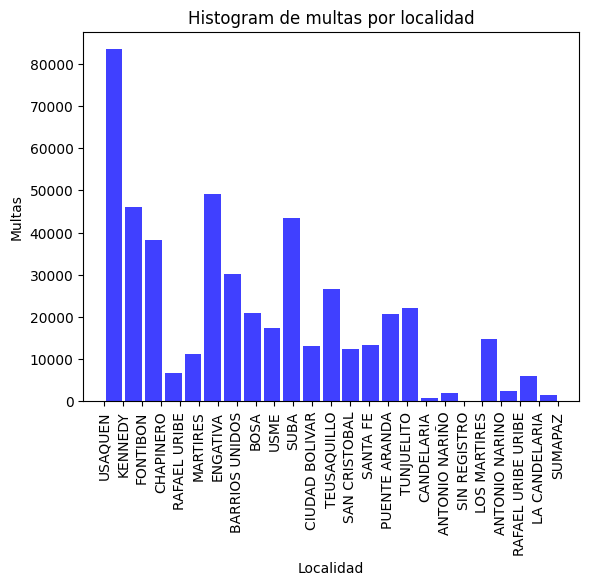

In [9]:
plt.hist(multas['LOCALIDAD'], bins=23, alpha=0.75, color='blue', rwidth=0.85, )
plt.xlabel('Localidad')
plt.xticks(rotation='vertical')
plt.ylabel('Multas')
plt.title('Histogram de multas por localidad')
plt.show()

In [10]:
multas["CLASE_VEHI"].unique()

array(['Automóvil', 'Camión', 'Motocicleta', '-', 'Bicicleta o Triciclo',
       'Camioneta', 'Bus', 'Campero', 'Volqueta', 'Microbus',
       'Mototriciclo', 'Buseta', 'MOTOCICLETA', 'CAMIONETA', 'AUTOMOVIL',
       'CAMION', 'CAMPERO', 'CAMIÓN', 'MICROBUS', 'BUS', 'BUSETA',
       'CICLOMOTOR', 'TRACTOCAMION', 'VOLQUETA', 'MOTOCARRO',
       'TRACTOCAMIÓN', 'Tractocamión', 'Motocarro', 'Motociclo',
       'Tracción Animal', ' ', 'MOTOTRICILO', 'BICICLETA O TRICICLO',
       'BUS ARTICULADO', 'CUATRIMOTO', 'MOTOCICLO', 'TRACCION ANIMAL',
       'Bus Articulado', 'Monopatines'], dtype=object)

In [11]:
# Suponiendo que tu dataset está almacenado en un DataFrame llamado 'df'
column_name = 'CLASE_VEHI'
reemplazar = ['MOTOCICLETA', 'CAMIONETA', 'AUTOMOVIL', 'CAMION', 'CAMPERO', 'CAMIÓN',
              'MICROBUS', 'BUS', 'BUSETA', 'CICLOMOTOR', 'TRACTOCAMION', 'VOLQUETA',
              'MOTOCARRO', 'TRACTOCAMIÓN', 'MOTOTRICILO', 'BICICLETA O TRICICLO',
              'TRACCION ANIMAL']
lista_de_vehiculos = ['Motocicleta', 'Camioneta', 'Automóvil', 'Camión', 'Campero', 'Camión',
                      'Microbus', 'Bus', 'Buseta', 'Ciclomotor', 'Tractocamion', 'Volqueta',
                      'Motocarro', 'Tractocamión', 'Mototriciclo', 'Bicicleta o Triciclo',
                      'Tracción Animal']

multas[column_name] = multas[column_name].replace(reemplazar, lista_de_vehiculos)
multas[column_name] = multas[column_name].replace('-', "SIN REGISTRO")

# Print the updated DataFrame
multas[column_name].unique()


array(['Automóvil', 'Camión', 'Motocicleta', 'SIN REGISTRO',
       'Bicicleta o Triciclo', 'Camioneta', 'Bus', 'Campero', 'Volqueta',
       'Microbus', 'Mototriciclo', 'Buseta', 'Ciclomotor', 'Tractocamion',
       'Motocarro', 'Tractocamión', 'Motociclo', 'Tracción Animal', ' ',
       'BUS ARTICULADO', 'CUATRIMOTO', 'MOTOCICLO', 'Bus Articulado',
       'Monopatines'], dtype=object)

In [12]:

bins = len(multas[column_name].unique())
multas[column_name]

0                    Automóvil
1                       Camión
2                       Camión
3                    Automóvil
4                  Motocicleta
                  ...         
482880            SIN REGISTRO
482881               Camioneta
482882    Bicicleta o Triciclo
482883    Bicicleta o Triciclo
482884            SIN REGISTRO
Name: CLASE_VEHI, Length: 482885, dtype: object

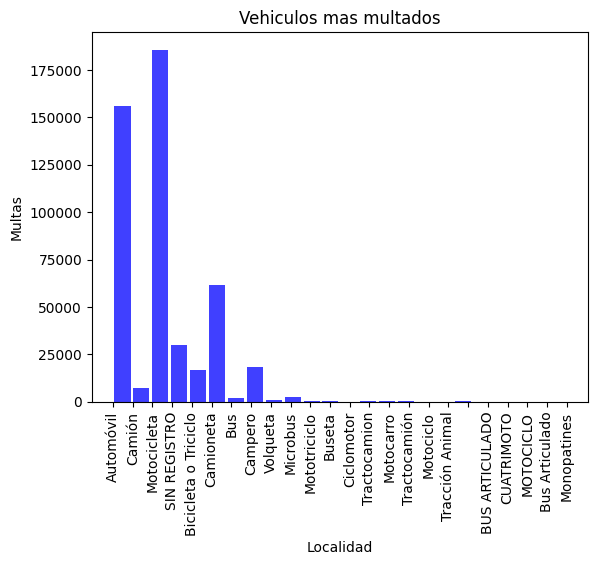

In [14]:
plt.hist(multas[column_name], bins=bins, alpha=0.75, color='blue', rwidth=0.85, )
plt.xlabel('Localidad')
plt.xticks(rotation='vertical')
plt.ylabel('Multas')
plt.title('Vehiculos mas multados')
plt.show()